<a href="https://colab.research.google.com/github/SiLiKhon/RICH_GAN_misc/blob/master/RICH_Data_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RICH Data Overview

## Get the data

The training sample is shared [here](https://cernbox.cern.ch/index.php/s/RkZoMRBofrhqzZm).

These are simulated detector responses for 6 particle types (below are per-file links to the same files as above):



*   electrons https://cernbox.cern.ch/index.php/s/q5ZwDYfvOXJmnBR
*   kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q
*   muons https://cernbox.cern.ch/index.php/s/jfw0Nhyw8gYNBhk
*   pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
*   protons https://cernbox.cern.ch/index.php/s/SQ6G6dmLOLTvMuz
*   ghosts https://cernbox.cern.ch/index.php/s/9Ui4xKerEDdw7Fv (these are 'fake' tracks - i.e. random tracker hits that look like a track from a real particle)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_pion = pd.read_csv('../data/v1_pion_train.csv')
df_kaon = pd.read_csv('../data/v1_kaon_train.csv')
df_electron = pd.read_csv('../data/v1_electron_train.csv')
df_proton = pd.read_csv('../data/v1_proton_train.csv')
df_muon = pd.read_csv('../data/v1_muon_train.csv')
df_ghost = pd.read_csv('../data/v1_ghost_train.csv')

In [6]:
print(df_pion.columns)
print(df_kaon.columns)

Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')


Input variables are:
*   `TrackP` – full momentum of the particle
*   `TrackPt` – length of the momentum projection to the XY plane
*   `TrackEta` – track [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)
*   `NumLongTracks` – number of reconstructed tracks in current event

Please note that among P, Pt and ETA there are only **two** independant variables. 


The variables to predict are:

*   `RichDLLbt`
*   `RichDLLk`
*   `RichDLLmu`
*   `RichDLLp`
*   `RichDLLe`


There's also one additional variable:

*   `MCParticleType` – particle [PDG code](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)




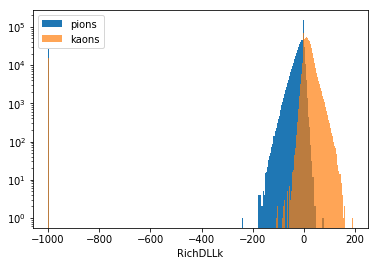

In [13]:
bins = np.linspace(
        start=min(df_pion.RichDLLk.min(), df_kaon.RichDLLk.min(),
                  df_electron.RichDLLk.min(), df_proton.RichDLLk.mean(), df_muon.RichDLLk.mean()
                 ), 
        stop =max(df_pion.RichDLLk.max(), df_kaon.RichDLLk.max(),
                  df_electron.RichDLLk.max(), df_proton.RichDLLk.max(), df_muon.RichDLLk.max()
                 ), 
        num=601
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

One can see there's a peak of outliers at the left handside of the plot. Let's not bother about it so far.

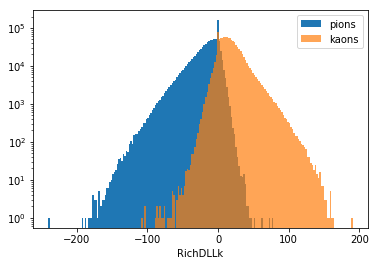

In [16]:
not_outlier_pion = df_pion.RichDLLk > -500
not_outlier_kaon = df_kaon.RichDLLk > -500

bins = np.linspace(
        start=min(df_pion.RichDLLk[not_outlier_pion].min(), df_kaon.RichDLLk[not_outlier_kaon].min()), 
        stop =max(df_pion.RichDLLk[not_outlier_pion].max(), df_kaon.RichDLLk[not_outlier_kaon].max()), 
        num=201
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

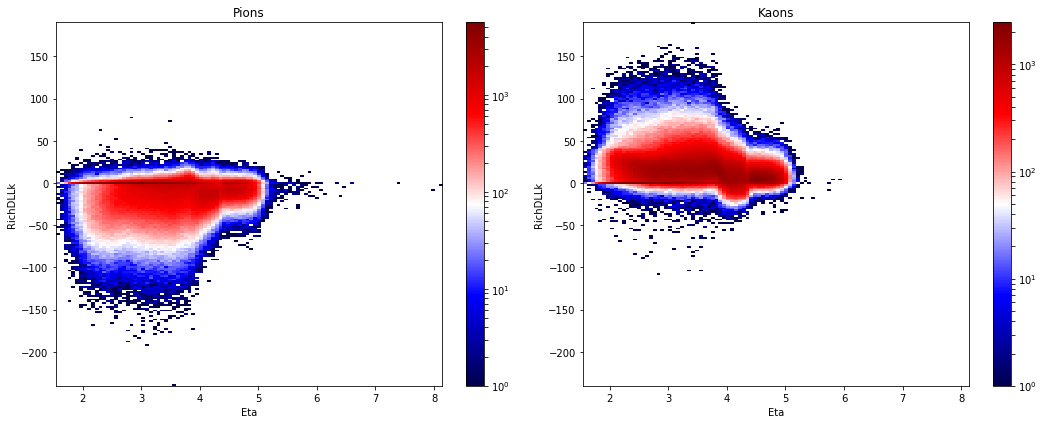

In [8]:
import matplotlib.colors as colors

fig, (ax_pion, ax_kaon) = plt.subplots(
                                    nrows=1,
                                    ncols=2,
                                    figsize=(15, 6)
                                )

_, bins_x, bins_y, img_pion = \
    ax_pion.hist2d(
            x=df_pion.TrackEta,
            y=df_pion.RichDLLk,
            bins=(100, bins),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_kaon = \
    ax_kaon.hist2d(
            x=df_kaon.TrackEta,
            y=df_kaon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )

plt.colorbar(img_pion, ax=ax_pion)
plt.colorbar(img_kaon, ax=ax_kaon)
ax_pion.set_xlabel('Eta')
ax_kaon.set_xlabel('Eta')
ax_pion.set_ylabel('RichDLLk')
ax_kaon.set_ylabel('RichDLLk')
ax_pion.set_title('Pions')
ax_kaon.set_title('Kaons')
fig.tight_layout();

## Look at the datasets

In [60]:
pred_var = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']
bins = np.zeros((len(pred_var), 201))

rich = 'RichDLLk'
non_outlier_pion = df_pion[rich] > -500
non_outlier_kaon = df_kaon[rich] > -500
non_outlier_electron = df_electron[rich] > -500
non_outlier_proton = df_proton[rich] > -500
non_outlier_muon = df_muon[rich] > -500
non_outlier_ghost = df_ghost[rich] > -500

for i in range(len(pred_var)):
    rich = pred_var[i]
    bins[i] = np.linspace(
        start=min(df_pion[rich][non_outlier_pion].min(), df_kaon[rich][non_outlier_kaon].min(),
                  df_electron[rich][non_outlier_electron].min(), df_proton[rich][non_outlier_proton].min(),
                  df_muon[rich][non_outlier_muon].min(), df_ghost[rich][non_outlier_ghost].min()
                 ), 
        stop =max(df_pion[rich].max(), df_kaon[rich].max(), df_electron[rich].max(),
                  df_proton[rich].max(), df_muon[rich].max(), df_ghost[rich].max()
                 ), 
        num=201
    )

In [61]:
def plot_df(df, bins, label):
    fig, axes = plt.subplots(nrows=1, ncols=len(pred_var), figsize=(20, 4))
    for i in range(len(pred_var)):
        axes[i].hist(df[pred_var[i]], bins=bins[i], label=label)
        axes[i].set_yscale('log')
        axes[i].legend()
        axes[i].set_xlabel(pred_var[i])
    fig.show()

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


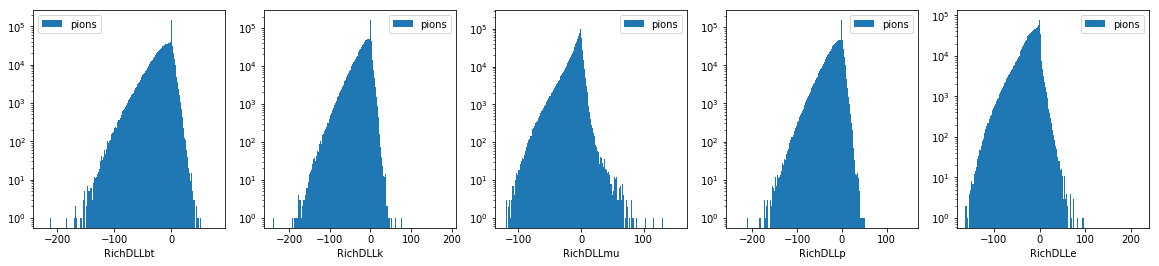

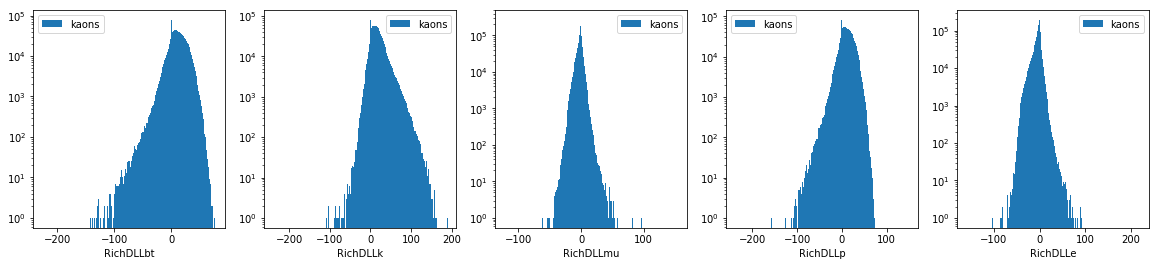

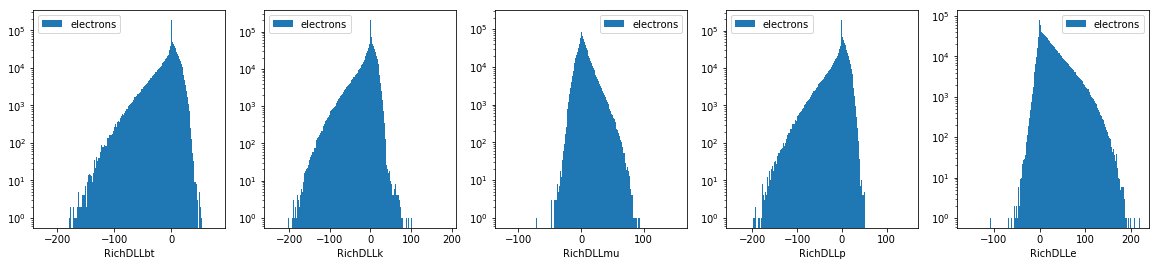

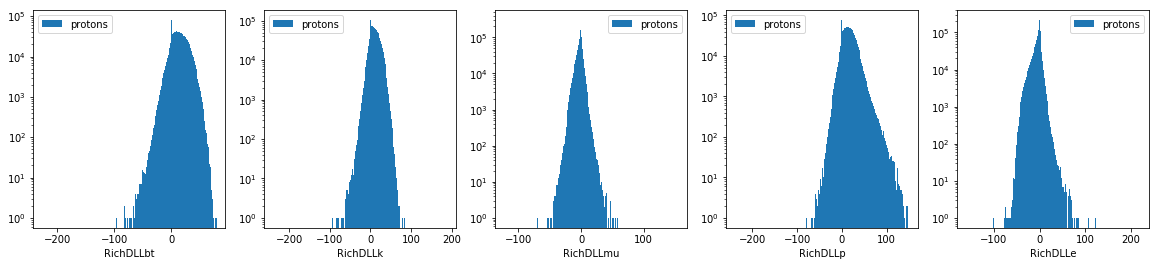

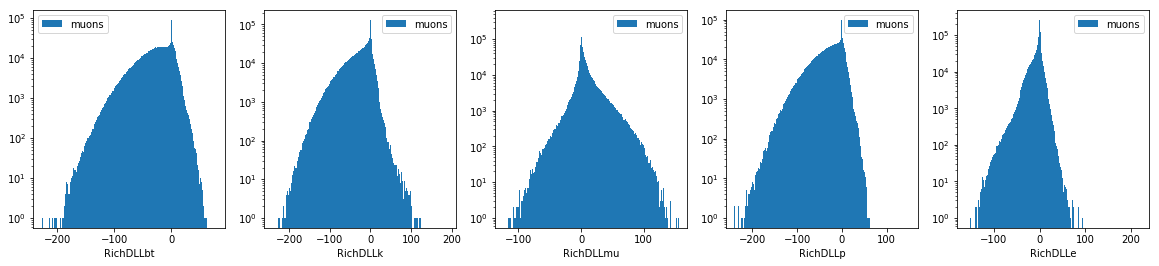

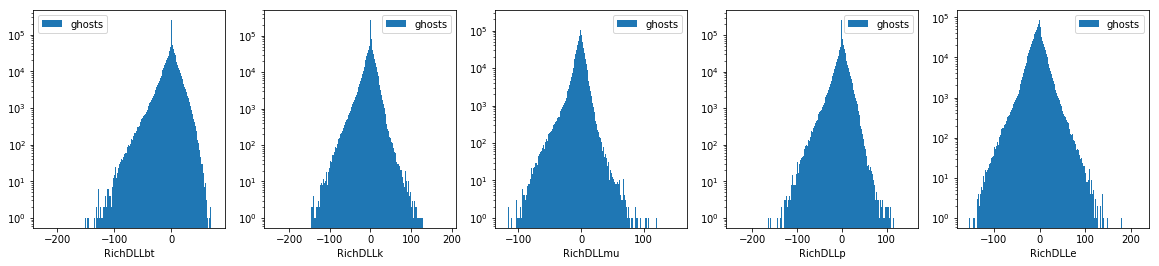

In [73]:
plot_df(df_pion, bins, 'pions')
plot_df(df_kaon, bins, 'kaons')
plot_df(df_electron, bins, 'electrons')
plot_df(df_proton, bins, 'protons')
plot_df(df_muon, bins, 'muons')
plot_df(df_ghost, bins, 'ghosts')

# The simplest model possible

In [47]:
class Model:
    def train(self, X, Y):
        self.means = {}
        self.stds = {}
        for col in Y.columns:
            self.means[col] = np.mean(Y[col])
            self.stds [col] = np.std (Y[col])

    def predict(self, X):
        prediction = pd.DataFrame()
        for col in self.means.keys():
            prediction[col] = np.random.normal(
                                loc=self.means[col],
                                scale=self.stds[col],
                                size=len(X)
                            )
        return prediction

In [48]:
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

In [49]:
x_cols = ['TrackP', 'TrackEta', 'NumLongTracks']
y_cols = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']


def score_func(sample1, sample2):
  score = 0
  
  # at first, let's ignore X
  for col in y_cols:
    score += ks_2samp(sample1[col], sample2[col])[0]
  return score

In [63]:
def train_df(df):
    kf = KFold(n_splits=5)

    model_scores = []
    best_scores  = []

    non_outlier = df.RichDLLk > -500
    for train_index, test_index in kf.split(df[x_cols]):
        X_train = df[x_cols].iloc[train_index]
        Y_train = df[y_cols].iloc[train_index]
        X_test  = df[x_cols].iloc[test_index ]
        Y_test  = df[y_cols].iloc[test_index ]
  
        model = Model()
        model.train(X_train[non_outlier[train_index]], Y_train[non_outlier[train_index]])
        Y_pred = model.predict(X_test)
  
        model_scores.append(score_func(Y_test, Y_pred ))
        best_scores .append(score_func(Y_test, Y_train))
    
    return Y_test, Y_pred, model_scores, best_scores
        

In [64]:
def visualise_df(Y_test, Y_pred, model_scores, best_scores):
    bins = np.linspace(
            start=min(model_scores + best_scores), 
            stop =max(model_scores + best_scores), 
            num=201
        )
    plt.hist(model_scores, bins=bins, label='model')
    plt.hist(best_scores , bins=bins, label='best possible', alpha=0.6)
    plt.legend()
    plt.xlabel('KS Scores');
    
    
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))
    i = 0
    for col in Y_pred.columns:
        _, bins, _ = axes[i].hist(Y_test[col], bins=100 , label='test'      )
        _, _   , _ = axes[i].hist(Y_pred[col], bins=bins, label='prediction', alpha=0.7)
        axes[i].legend()
        axes[i].set_xlabel(col)
        i += 1
    fig.show();

In [66]:
def train_and_visualise_df(df):
    Y_test, Y_pred, model_scores, best_scores = train_df(df)
    visualise_df(Y_test, Y_pred, model_scores, best_scores)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


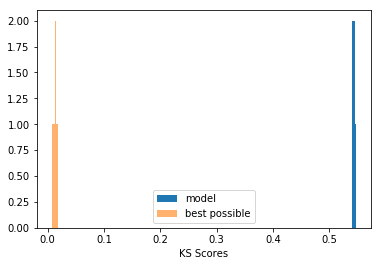

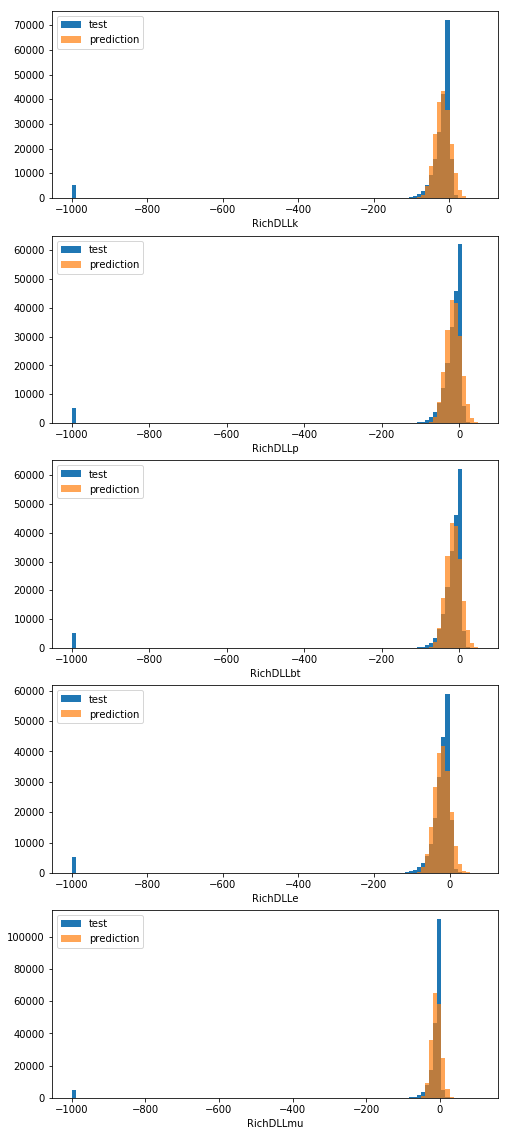

In [67]:
train_and_visualise_df(df_pion)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


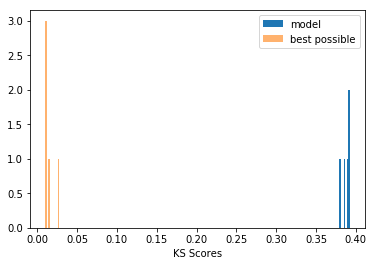

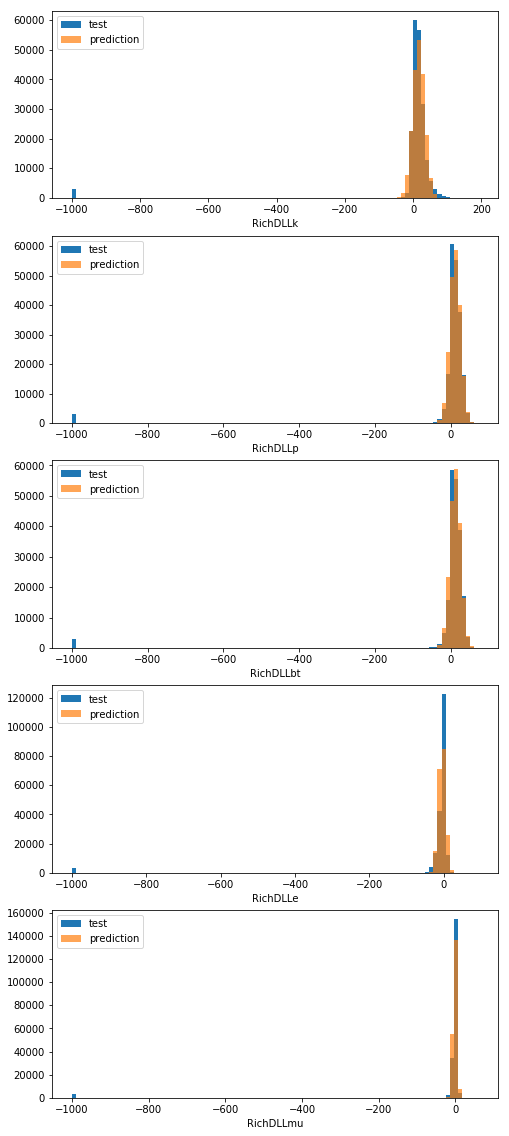

In [68]:
train_and_visualise_df(df_kaon)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


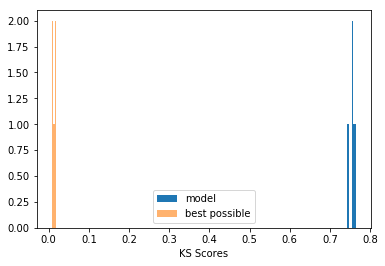

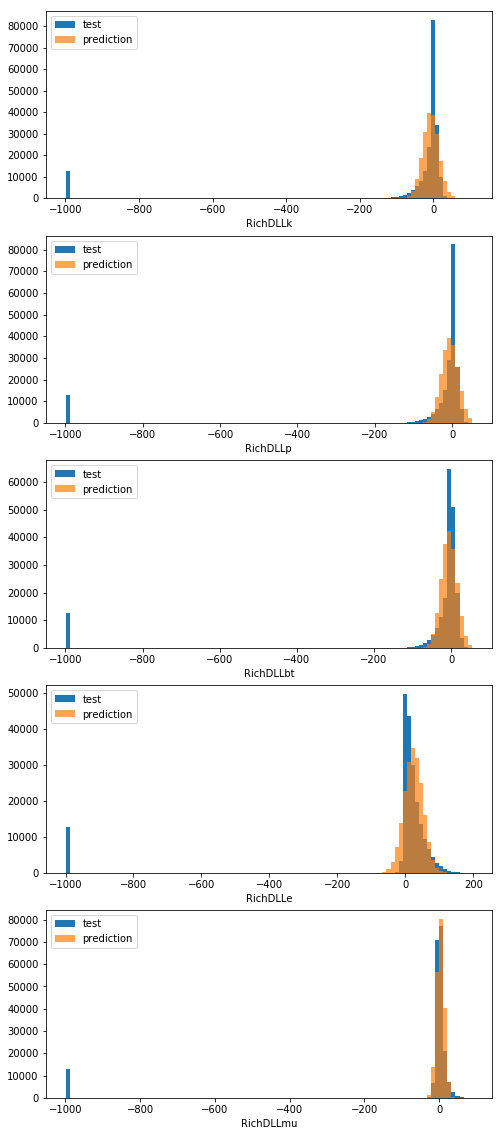

In [69]:
train_and_visualise_df(df_electron)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


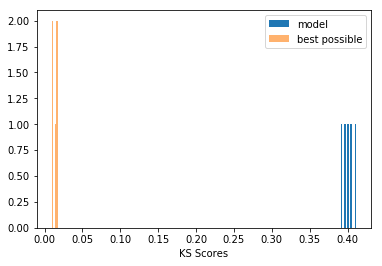

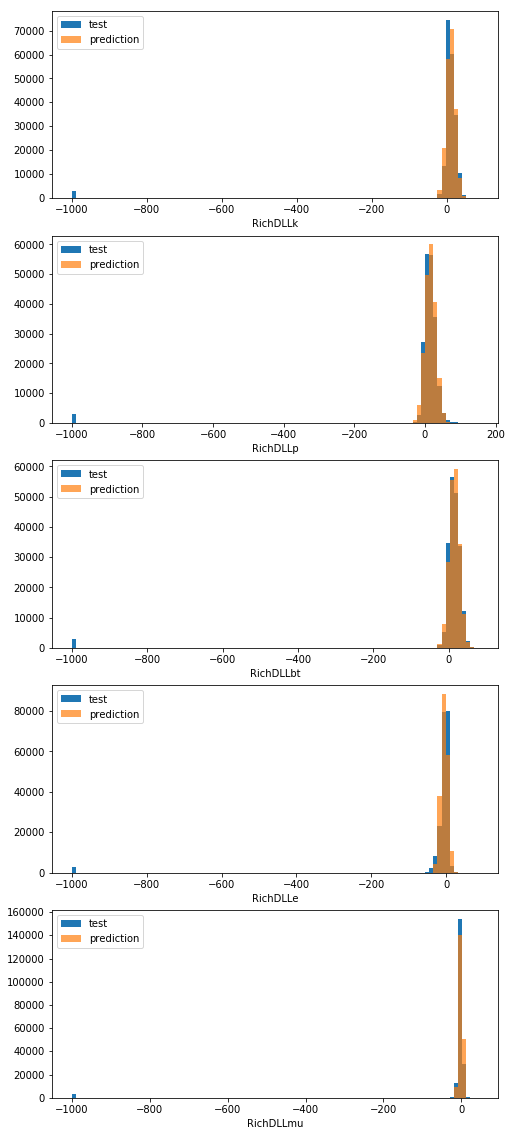

In [70]:
train_and_visualise_df(df_proton)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


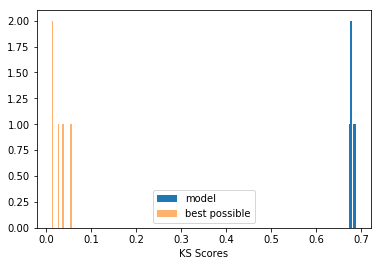

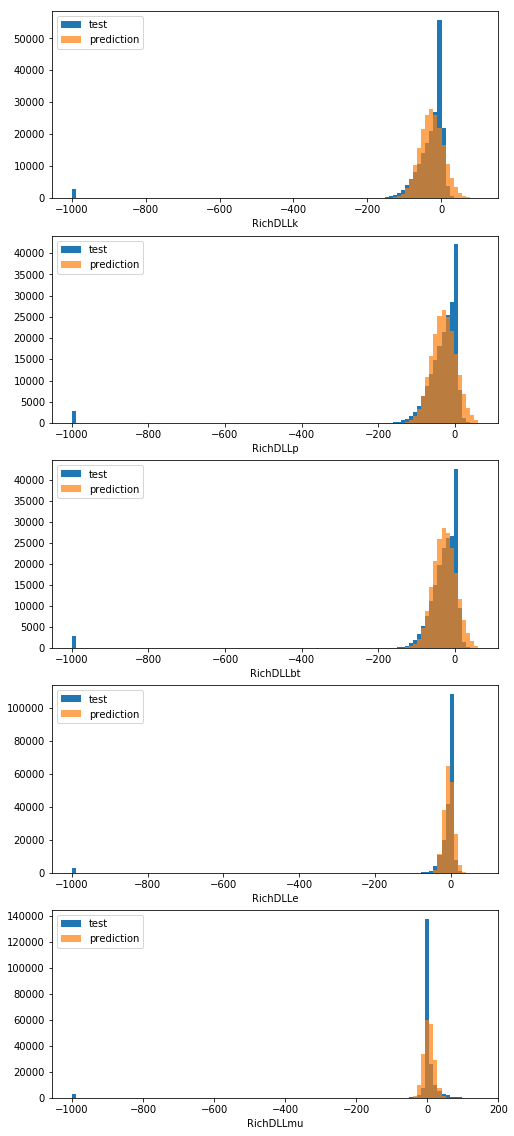

In [71]:
train_and_visualise_df(df_muon)

/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


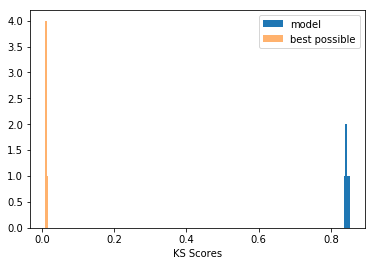

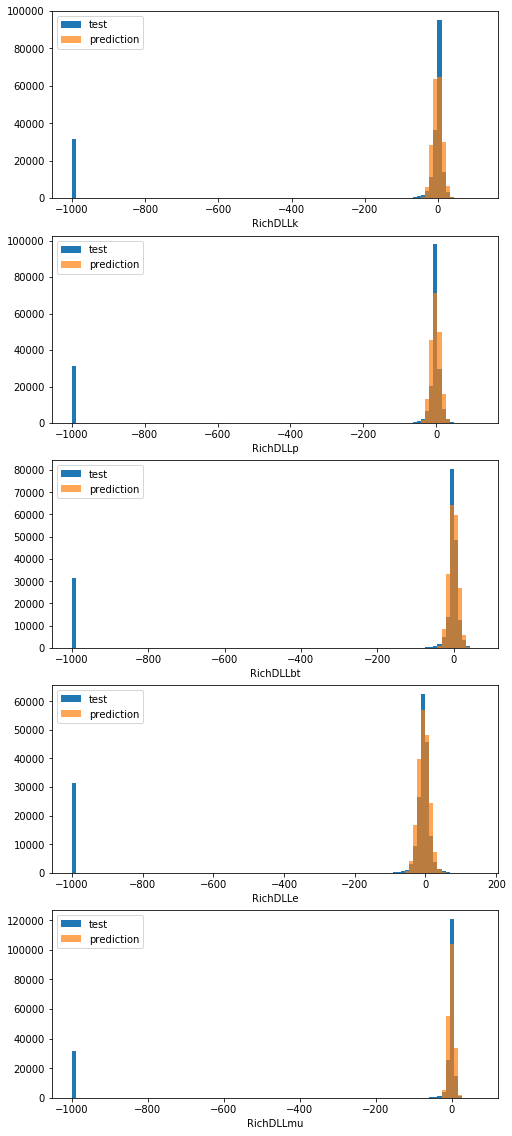

In [72]:
train_and_visualise_df(df_ghost)